<a href="https://colab.research.google.com/github/HMR1998/Laptop-Brands/blob/main/laptop_brand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
from statistics import mean
from scipy.optimize import curve_fit
import os

In [98]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Laptop_brands/laptops.csv')
df.head(5)

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [100]:
cols_to_drop = ['index', 'brand', 'Model', 'processor_brand', 'processor_tier',
                'gpu_brand']
df_corr = df.drop(columns=cols_to_drop)

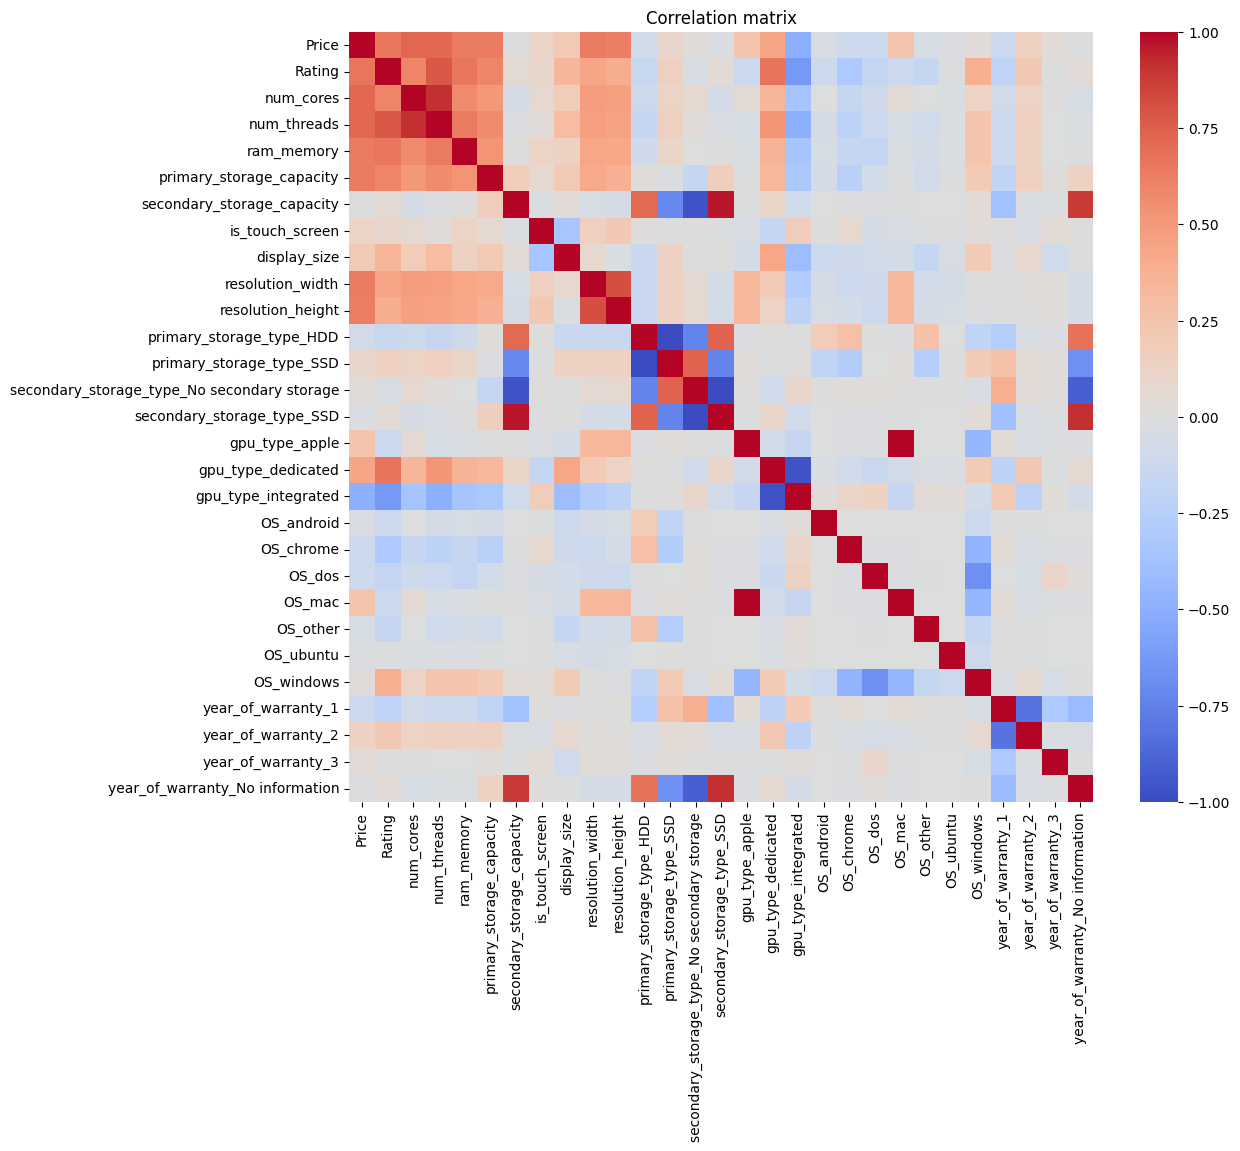

In [101]:
df_encoded = pd.get_dummies(df_corr)
corel = df_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corel, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [102]:
df.columns

Index(['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

Columns to keep

Brand, Price, Rating, num_cores, num_threads, ram_memory, primary_storage_capacity, gpu_type, display_size, resolution_width, resolution_height, OS.

In [103]:
joining_cols = ['primary_storage_capacity', 'gpu_type', 'display_size', 'resolution_width',
              'resolution_height', 'OS']
df = df.loc[:, 'brand':'ram_memory'].join(df[joining_cols])

In [104]:
df_shape = df.shape
num_of_nulls = df.isna().sum()
print(f'The dataset shape = {df_shape}\nThe number of null values are: \n{num_of_nulls}')

The dataset shape = (991, 15)
The number of null values are: 
brand                       0
Model                       0
Price                       0
Rating                      0
processor_brand             0
processor_tier              0
num_cores                   0
num_threads                 0
ram_memory                  0
primary_storage_capacity    0
gpu_type                    0
display_size                0
resolution_width            0
resolution_height           0
OS                          0
dtype: int64


In [105]:
df.head(5)

,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_capacity,gpu_type,display_size,resolution_width,resolution_height,OS
0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,512,integrated,15.6,1920,1080,windows
1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,1024,integrated,15.6,1920,1080,windows
2,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,512,dedicated,15.6,1920,1080,windows
3,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,512,integrated,14.0,1920,1080,windows
4,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,512,integrated,15.6,1920,1080,windows


Text(0, 0.5, 'Brands')

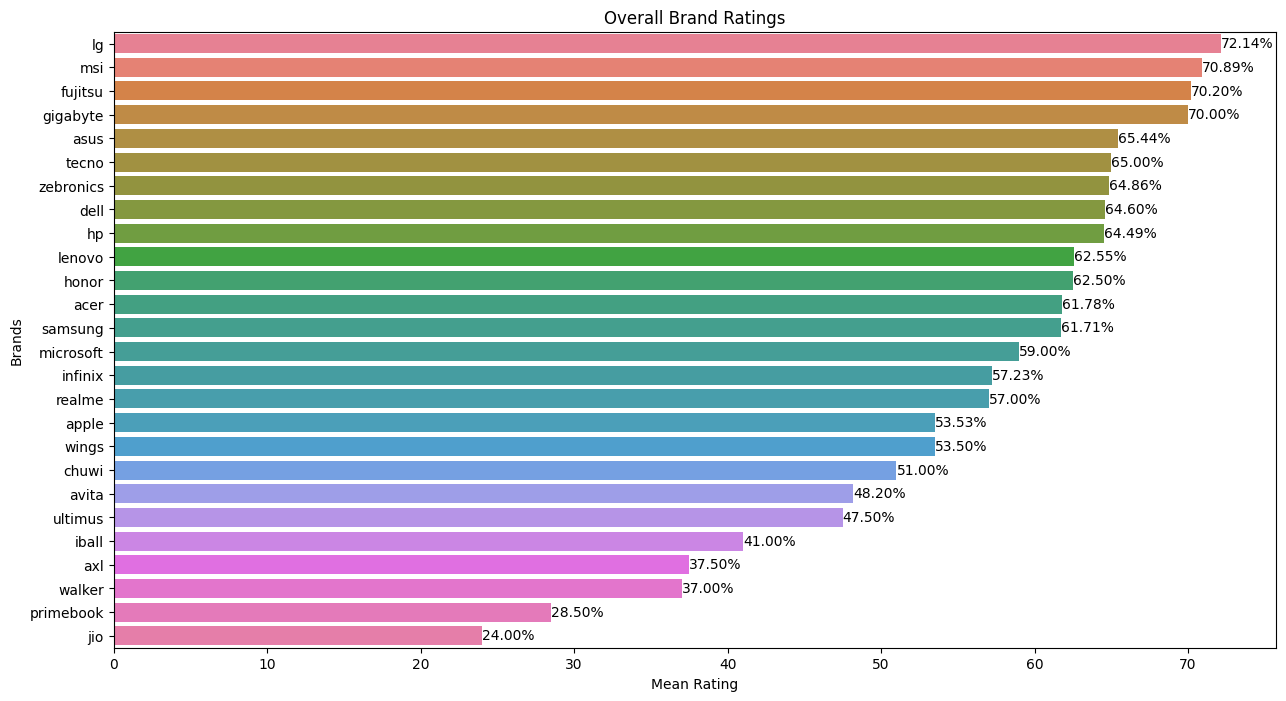

In [106]:
overall_brand_rating = df.groupby('brand')['Rating'].mean().sort_values(ascending=False)
brand_rating_df = pd.DataFrame(overall_brand_rating)

plt.figure(figsize=(15,8))

sns.barplot(brand_rating_df, x='Rating', y='brand', hue='brand')

for i, rating in enumerate(overall_brand_rating):
  plt.text(rating, i, f'{rating:.2f}%', va='center')


plt.title('Overall Brand Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Brands')

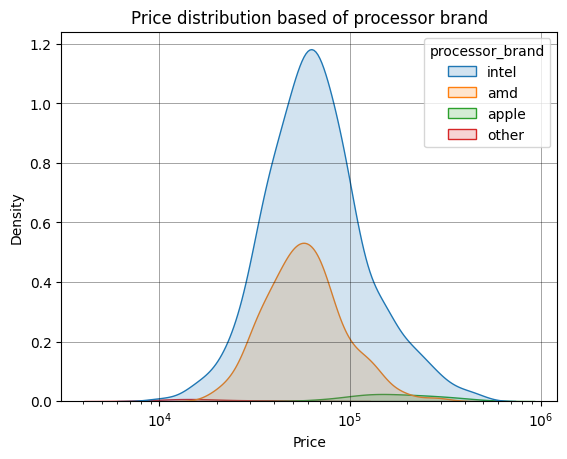

In [107]:
fig = figsize =(10,8)

sns.kdeplot(data=df, x='Price', log_scale=True, hue='processor_brand', fill=True,
            alpha=0.2)

plt.grid(color='black', linestyle='solid', linewidth=0.5, alpha=0.5)
plt.title('Price distribution based of processor brand')
plt.show()

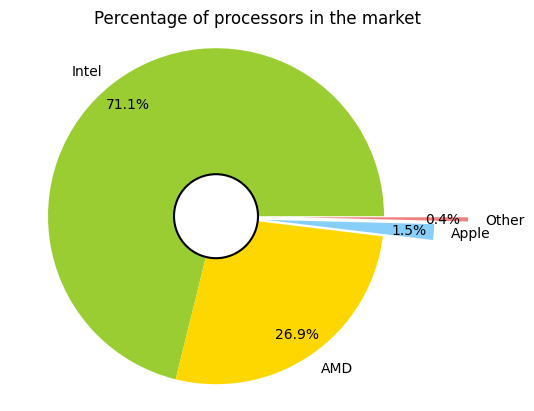

In [108]:
df['number'] = df.groupby('processor_brand')['processor_brand'].transform('count')

processor_name = ['Intel', 'AMD', 'Apple', 'Other']
count = df['number'].unique()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = [0.0, 0.0, 0.3, 0.5]

plt.pie(count, colors=colors, labels=processor_name, autopct='%1.1f%%',
        pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0,0),0.25,color='black', fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Percentage of processors in the market')
plt.axis('equal')
plt.show()

In [109]:
df.describe()

,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height,number
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043,573.718466
std,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019,209.013374
min,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000,4.000000
25%,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,267.000000
50%,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000,705.000000
75%,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,705.000000
max,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000,705.000000


In [110]:
df['Price'] = df['Price'] / 100

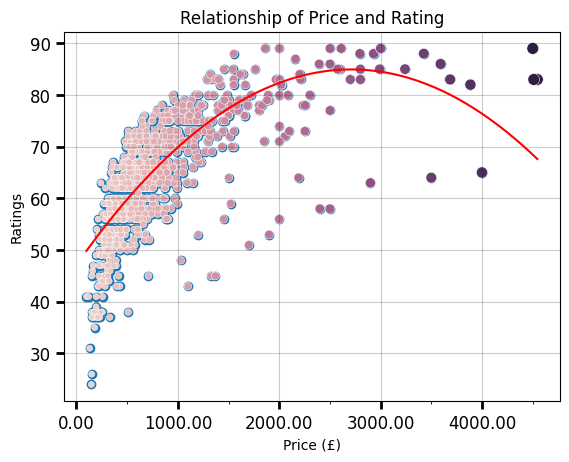

In [121]:
def model_f(x,a,b,c):
  return a*(x-b)**2+c


fig = figsize=(10,8)

x = df['Price']
y = df['Rating']

popt, pcov = curve_fit(model_f, x, y)

a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x), max(x),100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

plt.scatter(x, y)
plt.plot(x_model, y_model, color='r')

sns.scatterplot(data=df, x=x, y=y, hue='Price', size='Price', legend=False)

plt.grid(color='Black', linestyle='solid', alpha=0.2)
plt.tick_params(axis='both', labelsize=12, length=6, width=2, color='black', direction='out')
plt.gca().xaxis.set_major_formatter('{:.2f}'.format)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(500))


plt.title('Relationship of Price and Rating')
plt.xlabel('Price (£)')
plt.ylabel('Ratings')
plt.show()

In [124]:
df.to_csv('/content/drive/MyDrive/Datasets/Laptop_brands/model_data', index=False)